<a href="https://colab.research.google.com/github/iqbalamo93/keras_RNN/blob/master/CNN_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
from tensorflow.keras.datasets import fashion_mnist

In [36]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [38]:
x_train.shape

(60000, 28, 28)

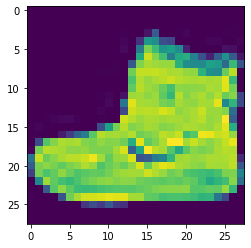

In [39]:
plt.imshow(x_train[0])

In [40]:
x_train.min(),x_train.max()

(0, 255)

In [41]:
x_train=x_train/255
x_test =x_test/255

In [42]:
x_train=x_train.reshape(60000,28,28,1)

In [43]:
x_test=x_test.reshape(10000,28,28,1) 

In [44]:
from tensorflow.keras.utils import to_categorical

In [45]:
y_cat_train = to_categorical(y_train,10)

In [46]:
y_cat_test = to_categorical(y_test,10)

In [47]:
from tensorflow.keras.models import Sequential

In [48]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [49]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.fit(x_train,y_cat_train,validation_data=(x_test,y_cat_test),epochs=3)

Epoch 1/3
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2833 - accuracy: 0.8977 - val_loss: 0.3157 - val_accuracy: 0.8831
Epoch 2/3
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2388 - accuracy: 0.9123 - val_loss: 0.2852 - val_accuracy: 0.8900
Epoch 3/3
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2050 - accuracy: 0.9240 - val_loss: 0.2612 - val_accuracy: 0.9050


In [53]:
model.metrics_names

['loss', 'accuracy']

In [54]:
metrics = pd.DataFrame(model.history.history)

In [55]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

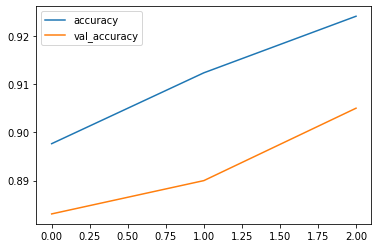

In [56]:
metrics[['accuracy','val_accuracy']].plot()

In [57]:
from sklearn.metrics import classification_report

In [58]:
predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [59]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.87      0.80      0.83      1000
           3       0.91      0.93      0.92      1000
           4       0.78      0.90      0.84      1000
           5       0.97      0.98      0.98      1000
           6       0.76      0.69      0.73      1000
           7       0.95      0.96      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.91      0.90     10000

